In [36]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
# import seaborn as sns
from numpy import sort
#import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import random
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [37]:
data_path = "F:\\Users\\ivann_000\\AnacondaProjects\\MLBootcamp4\\data"
X = pd.read_csv(data_path+"\\x_train.csv", sep=';', header=None)
y = pd.read_csv(data_path+"\\y_train.csv", sep=';', header=None)[0]
X = pd.DataFrame(preprocessing.minmax_scale(X))

In [38]:
XX = X.copy()
corr_features = []
corr = XX.corr()
for i in corr:
    for j in corr:
        if ((corr[i][j] > 0.90) and (i!=j) and (i<j)):
            added = False
            for l, k in enumerate(corr_features):
                if not added:
                    if (i in k):
                        if j not in k:
                            k.append(j)
                        added = True
                    if (j in k):
                        if i not in k:
                            k.append(i)
                        added = True
            if not added:
                corr_features.append([i, j])
for i, c in enumerate(corr_features):
    for j, col in enumerate(c):
        if j == 0:
            XX['mean_'+str(i)]=XX[col]
        else:
            XX['mean_'+str(i)] += XX[col]
    XX['mean_'+str(i)] /= len(c)
#     for j, col in enumerate(c):
#         XX[str(col)+'_from_mean'] = XX['mean_'+str(i)] - XX[col]
features_to_drop = np.array([])
for f in corr_features:
    features_to_drop = np.append(features_to_drop, f)
print(features_to_drop)
XX = XX.drop(features_to_drop, axis=1)
len(XX.columns)

[   0.    6.   26.   30.   51.   61.   70.  135.  138.  157.  183.  193.
  208.   23.   54.  120.  198.    1.    2.    7.   46.   69.   94.  117.
  118.  167.  199.  200.  216.  105.   81.  185.   13.   89.  141.  174.
  215.   19.  186.   32.  201.  219.   41.  184.  218.   58.   59.   66.
   76.   79.   87.  188.  213.  102.  103.  104.  107.  108.  128.  144.
  150.  168.  190.   12.   13.   87.  141.  174.   35.  102.  104.  107.
  144.  170.  190.  195.   58.  128.  155.   76.  125.   17.   18.   27.
   59.   72.   79.  108.  114.  168.  171.  179.  221.  184.   22.   98.
  112.   28.   29.   57.  104.   43.   32.   66.   90.   33.   77.   84.
  113.  127.  131.  139.  146.  148.  154.  165.  172.  177.   36.  163.
   92.  122.  162.  136.  147.  212.  209.   34.   44.   45.   64.   97.
  116.  169.  187.  204.  210.   78.  220.   85.   99.  176.   35.   76.
   58.   41.  150.   47.   49.  136.  147.   62.  180.   55.  130.  143.
  101.   63.  205.   71.  191.   78.   85.   99.  1

103

Feature ranking:
1. feature 6 (0.015007)
2. feature 86 (0.014380)
3. feature 0 (0.012908)
4. feature 12 (0.012098)
5. feature 68 (0.011954)
6. feature 27 (0.011583)
7. feature 1 (0.011515)
8. feature 56 (0.011504)
9. feature 20 (0.011429)
10. feature 35 (0.011419)
11. feature 61 (0.011417)
12. feature 81 (0.011248)
13. feature 11 (0.011241)
14. feature 22 (0.011155)
15. feature 18 (0.011108)
16. feature 36 (0.011073)
17. feature 13 (0.011046)
18. feature 7 (0.011026)
19. feature 44 (0.011003)
20. feature 26 (0.010954)
21. feature 67 (0.010943)
22. feature 74 (0.010921)
23. feature 15 (0.010873)
24. feature 64 (0.010873)
25. feature 76 (0.010870)
26. feature 14 (0.010870)
27. feature 37 (0.010846)
28. feature 16 (0.010843)
29. feature 73 (0.010796)
30. feature 52 (0.010776)
31. feature 23 (0.010752)
32. feature 79 (0.010694)
33. feature 65 (0.010684)
34. feature 63 (0.010672)
35. feature 85 (0.010665)
36. feature 54 (0.010625)
37. feature 10 (0.010547)
38. feature 75 (0.010514)
39. feat

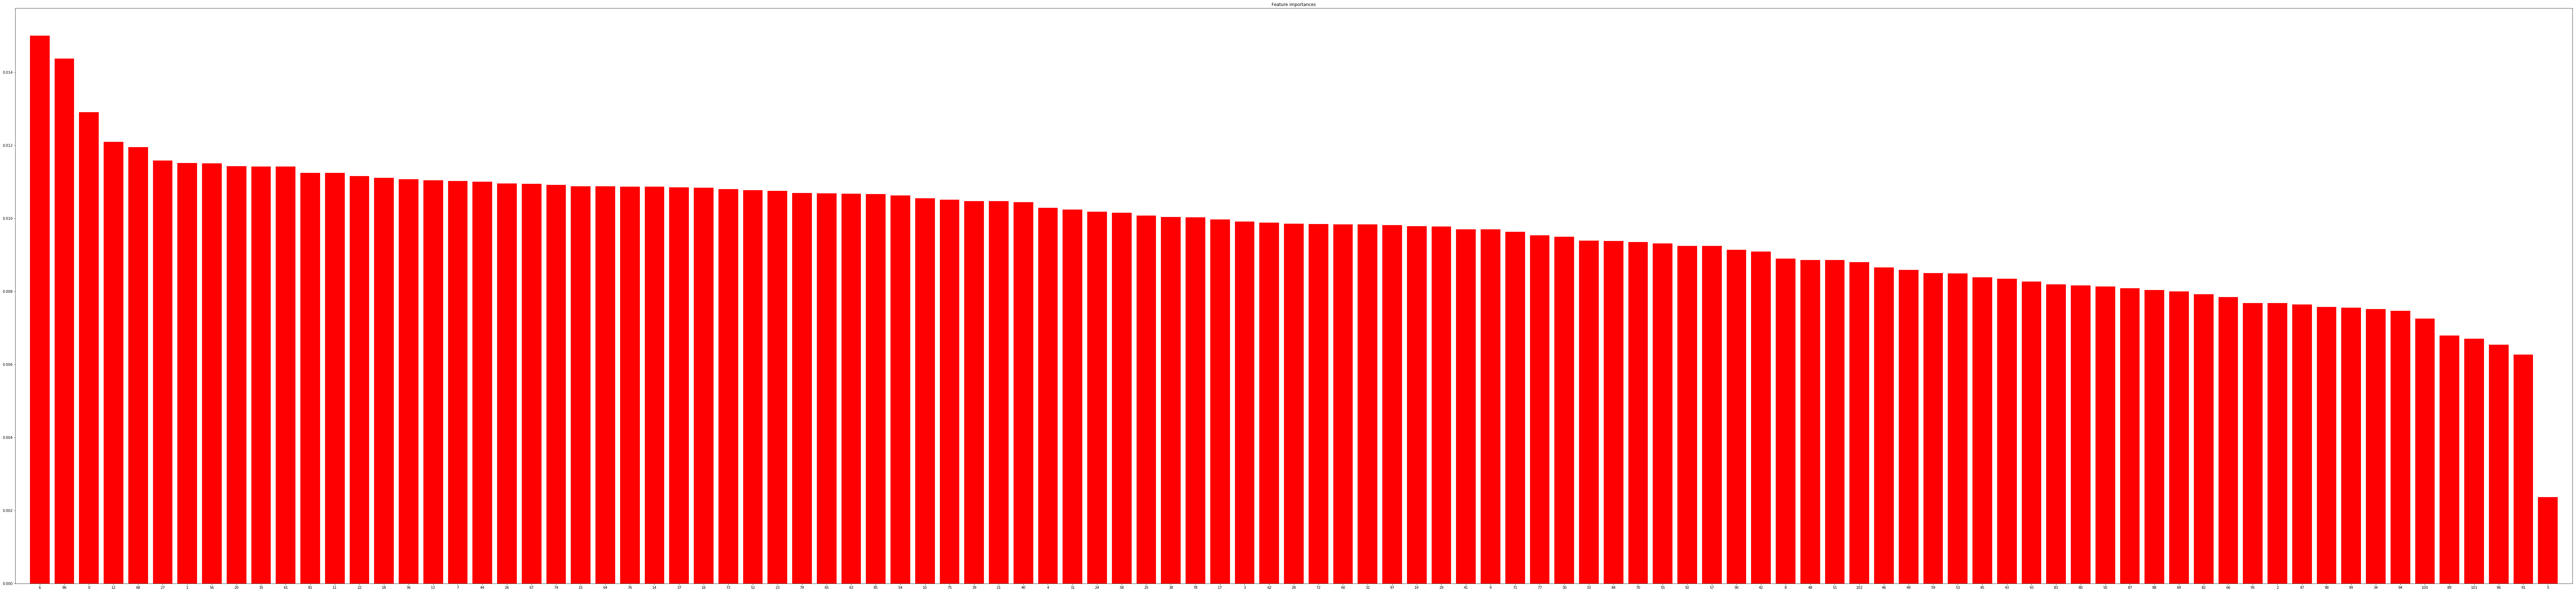

0.56005236036004036

In [39]:
model = XGBClassifier(n_estimators=1200,
                               nthread=8,
                               max_depth=15,
                                learning_rate=0.01,
                                colsample_bytree=0.5,
                               seed=4242)
model.fit(XX, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(XX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(130,30))
plt.title("Feature importances")
plt.bar(range(XX.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(XX.shape[1]), indices)
plt.xlim([-1, XX.shape[1]])
plt.show()



cross_val_score(model, XX, y, scoring='accuracy', cv=3).mean()

In [ ]:
# by 12: 0.55746098132016775